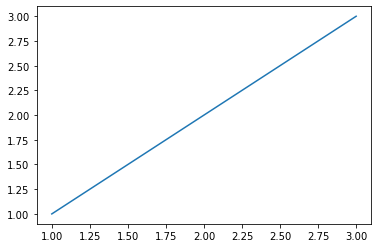

In [1]:
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
import matplotlib
from tkinter import ttk
import pandas as pd


root = Tk()

root.title("Data quality")
root.iconbitmap('icon.ico')
root.geometry('500x500')
#Menu configuration

my_menu = Menu(root)
root.config(menu=my_menu)

def _quit():
        root.quit()  
        root.destroy()

#Create file



def file_new():
    global fig
    hide_all_frames()
    file_new_frame.pack(fill="both",expand=1)

    canvas = FigureCanvasTkAgg(fig, file_new_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbarFrame = Frame(master=file_new_frame)
    toolbarFrame.pack()
    toolbar = NavigationToolbar2Tk(canvas, toolbarFrame)
        
   
            
    def plot(x,y):
        ax.plot(x,y)
        canvas.draw()

    def click(val):
        ax.clear()
        if val==1:
            y=[1,2,3]
            x=[1,2,3]
            plot(x,y)
        else:
            y=[5,4,3]
            x=[1,2,3]
            plot(x,y)



    r =IntVar()
    Radiobutton(file_new_frame,text="Option 1",variable=r,value=1,command=lambda: click(r.get())).pack()
    Radiobutton(file_new_frame,text="Option 2",variable=r,value=2,command=lambda: click(r.get())).pack()
    Button(master=file_new_frame, text="Exit", command=_quit).pack()

    
def edit_cut():
    hide_all_frames()
    edit_cut_frame.pack(fill="both",expand=1)
    style = ttk.Style()
    style.configure("Treeview",rowheight=25,foreground="black")
    style.configure("Treeview.Heading", font=('Calibri', 13,'bold'),background="White",foreground="black") # Modify the font of the headings
    style.map('Treeview',
             background=[('active','white')],
             foreground=[('active','black')])

    tree_frame= Frame(edit_cut_frame)
    tree_frame.pack()
    tree_scroll = Scrollbar(tree_frame,orient="vertical")
    tree_scroll.pack(side=RIGHT,fill="y")

    tree_scroll2 = Scrollbar(tree_frame,orient="horizontal")
    tree_scroll2.pack(side=BOTTOM,fill="x")

    sample = {"File Name":[f"{i}" for i in range(15)],
              'Sheet Name': [f"sheet_{i}" for i in range(15)],
              'Number Of Rows': [f"row_{i}" for i in range(15)],
              'Number Of Columns': [f"col_{i}" for i in range(15)],
              'Number Of Columns2': [f"col_{i}" for i in range(15)],
              'Number Of Columns3': [f"col_{i}" for i in range(15)],
              'Number Of Columns4': [f"col_{i}" for i in range(15)],
              'Number Of Columns5': [f"col_{i}" for i in range(15)]
              }


    df = pd.DataFrame(sample)
    cols = list(df.columns)

    tree = ttk.Treeview(tree_frame,yscrollcommand=tree_scroll.set,xscrollcommand=tree_scroll2.set)
    tree.tag_configure('warning', background='red')
    tree.column("#0",width=0,stretch=NO)
    tree.pack()
    tree_scroll.config(command=tree.yview)
    tree_scroll2.config(command=tree.xview)
    tree["columns"] = cols
    for i in cols:
        tree.column(i, anchor="w",width=150,minwidth=200)
        tree.heading(i, text=i, anchor='w')

    for index, row in df.iterrows():
        if int(df.loc[index]["File Name"]) % 2==0:
            tree.insert("",index="end",text=index,values=list(row),tags = ('warning',))
        else:
            tree.insert("",index="end",text=index,values=list(row))

    def alld():
        tree.delete(*tree.get_children())
    def kik():
        sample = {"File Name":[f"{i}" for i in range(11)],
              'Sheet sss': [f"sheet_{i}" for i in range(11)],
              'Number Of Rows ss': [f"row_{i}" for i in range(11)],
              'Number Of Columns': [f"col_{i}" for i in range(11)],
              'Number Of Columns2': [f"col_{i}" for i in range(11)],
              'Number Of Columns3': [f"col_{i}" for i in range(11)],
              'Number Of Columns4': [f"col_{i}" for i in range(11)],
              'Number Of Columns5': [f"col_{i}" for i in range(11)]
              }
        df = pd.DataFrame(sample)
        cols = list(df.columns)
        tree["columns"] = cols
        for i in cols:
            tree.column(i, anchor="w",width=150,minwidth=200)
            tree.heading(i, text=i, anchor='w')

        for index, row in df.iterrows():
            if int(df.loc[index]["File Name"]) % 2==0:
                tree.insert("",index="end",text=index,values=list(row),tags = ('warning',))
            else:
                tree.insert("",index="end",text=index,values=list(row))

    Button(edit_cut_frame,text="Delete",command=alld).pack()

    Button(edit_cut_frame,text="Create",command=kik).pack()

def hide_all_frames():
    for widget in file_new_frame.winfo_children():
        widget.destroy()
    for widget in edit_cut_frame.winfo_children():
        widget.destroy()       
    file_new_frame.pack_forget()
    edit_cut_frame.pack_forget()
 


    
file_menu = Menu(my_menu,tearoff=False)
my_menu.add_cascade(label="Visualisation",menu=file_menu)
file_menu.add_command(label="Illumination",command = file_new)
file_menu.add_separator()
file_menu.add_command(label="Exit",command=_quit)

#Create edit
edit_menu = Menu(my_menu,tearoff=False)
my_menu.add_cascade(label="Data quality",menu=edit_menu)
edit_menu.add_command(label="Check database",command = edit_cut)


#Create frames

file_new_frame = Frame(root)
fig,ax = plt.subplots()
edit_cut_frame = Frame(root)    

root.mainloop()